# 11.4 頻域訊號處理

In [1]:
%pylab inline 
from sympy import *
init_printing(use_unicode = True)

Populating the interactive namespace from numpy and matplotlib


### 11.4.1 FFT 知識複習

In [2]:
x = np.random.rand(8)
x

array([ 0.24078081,  0.36383542,  0.29618392,  0.95090474,  0.45139678,
        0.11421285,  0.81640447,  0.04707509])

In [3]:
xf = np.fft.fft(x)
xf
# xf[0], xf[N/2] 的虛部為 0
# xf[i], xf[N-i] 為共軛

array([ 3.28079408+0.j        , -0.67321022-0.29539334j,
       -0.42041080+0.51993155j,  0.25197829-1.33583443j,
        0.32873788+0.j        ,  0.25197829+1.33583443j,
       -0.42041080-0.51993155j, -0.67321022+0.29539334j])

In [4]:
# 用 ifft 還原
np.fft.ifft(xf)

array([ 0.24078081 +0.00000000e+00j,  0.36383542 -7.97332641e-17j,
        0.29618392 +2.22044605e-16j,  0.95090474 -3.12890383e-17j,
        0.45139678 +0.00000000e+00j,  0.11421285 -1.35244415e-16j,
        0.81640447 -2.22044605e-16j,  0.04707509 +2.46266718e-16j])

In [5]:
np.real(np.fft.ifft(xf))
# xf[0] 為直流的成份
# xf[i] a+bj 為 週期為 N/i 正弦餘弦成份，a 為餘弦成份，b 為正弦成份

array([ 0.24078081,  0.36383542,  0.29618392,  0.95090474,  0.45139678,
        0.11421285,  0.81640447,  0.04707509])

In [6]:
x = np.ones(8)
np.fft.fft(x) / len(x)
# 直流的部份只存在在 xf[0]

array([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j])

In [7]:
# 週期為8 的正弦訊號
x = np.arange(0, 2*np.pi, 2*np.pi / 8)
y = np.sin(x)
yf = np.fft.fft(y) / len(y)
print(np.array_str(yf, suppress_small=True))

[ 0.+0.j  -0.-0.5j  0.-0.j   0.-0.j   0.+0.j   0.-0.j   0.+0.j   0.+0.5j]


In [8]:
# 週期為8 的餘弦訊號
x = np.arange(0, 2*np.pi, 2*np.pi / 8)
y = np.cos(x)
yf = np.fft.fft(y) / len(y)
print(np.array_str(yf, suppress_small=True))

[-0.0+0.j  0.5-0.j  0.0+0.j  0.0+0.j  0.0+0.j -0.0+0.j  0.0+0.j  0.5-0.j]


In [9]:
# 週期為 4, 振幅為 2的 sine wave
yf = np.fft.fft(np.sin(x*2)*2) / len(x)
print(np.array_str(yf, suppress_small=True))

[ 0.+0.j  0.+0.j -0.-1.j  0.-0.j  0.+0.j  0.+0.j -0.+1.j  0.-0.j]


In [10]:
# 週期為 4, 振幅為 0.8 的 cosine wave
yf = np.fft.fft(np.cos(x*2)*0.8) / len(x)
print(np.array_str(yf, suppress_small=True))

[-0.0+0.j -0.0+0.j  0.4-0.j  0.0-0.j  0.0+0.j  0.0-0.j  0.4+0.j -0.0+0.j]


In [11]:
# 混和波
x = np.arange(0, 2 * np.pi, 2 * np.pi / 128)
y = 0.3 * np.cos(x) + 0.5 * np.cos(2 * x + np.pi/4) + 0.8 * np.cos(3 * x - np.pi/3)
yf = np.fft.fft(y) / len(x)
print(np.array_str(yf[:4], precision = 4, suppress_small=True))

[ 0.0000+0.j      0.1500+0.j      0.1768+0.1768j  0.2000-0.3464j]


In [12]:
print(np.abs(yf[1]), np.rad2deg(np.angle(yf[1])))
# 週期為 128 (128/1) 的餘弦波 的振幅和相位

0.15 2.48480834489e-15


In [13]:
print(np.abs(yf[2]), np.rad2deg(np.angle(yf[2])))
# 週期為 64 (128/2) 的餘弦波 的振幅和相位

0.25 45.0


In [14]:
print(np.abs(yf[3]), np.rad2deg(np.angle(yf[3])))
# 週期為 42.6 (128/3) 的餘弦波 的振幅和相位

0.4 -60.0


In [15]:
# 運算效率 和 N能被分解到多小有關
x1 = np.random.random(4096)
x2 = np.random.random(4093)
%timeit np.fft.fft(x1)
%timeit np.fft.fft(x2)

The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 136 µs per loop
10 loops, best of 3: 37.4 ms per loop


### 11.4.2 合成時域訊號
#### 三角波

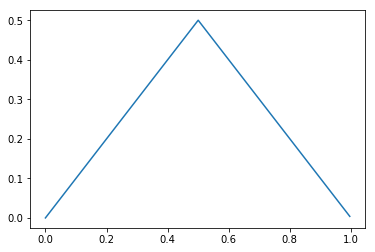

In [16]:
def triangle_wave(size):
    x = np.arange(0, 1, 1.0/size)
    y = np.where(x < 0.5, x, 0)
    y = np.where(x >= 0.5, 1-x, y)
    return x, y

x, y  = triangle_wave(256)
plt.plot(x, y);

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


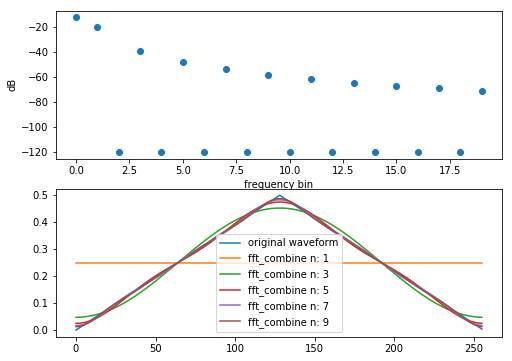

In [17]:
# 取 FFT 計算結果 bins 中的前 n 項進行合成，傳回合成結果，計算 loops 個週期的波形
def fft_combine(bins, n, loops = 1):
    length = len(bins) * loops
    data = np.zeros(length)
    index = np.arange(0, length, 1.0) * loops / length * (2 * np.pi)
    
    for k, p in enumerate(bins[:n]):
        if k != 0: p *= 2  # 除了直流成份之外，其他的係數都程以 2
        data += np.real(p) * np.cos(k*index)  # 餘弦成份的係數為實數部份
        data -= np.imag(p) * np.sin(k*index)  # 正弦成份的係數為虛數部份
        
    return index, data

# 產生三角波及其FFT
fft_size = 256
x, y = triangle_wave(fft_size)
yf = np.fft.fft(y) / fft_size

# 繪製三角波FFT前20項的振幅
# 由於不含索引為偶數的值均為0，因此取Log之後無限小，無法繪圖。
# 用 np.clip限制陣列值的上下限，保障繪圖正確
fig, axes = plt.subplots(2, 1, figsize = (8, 6))
axes[0].plot(np.clip(20 * np.log10(np.abs(yf[:20])), -120, 120), 'o', label = 'spectrum')
axes[0].set_xlabel('frequency bin')
axes[0].set_ylabel('dB') 


# 繪製原始的三角波和用正弦波逐級合成的結果，使用的取樣點為 x 軸的座標
axes[1].plot(y, label = 'original waveform')
for n in range(1, 10, 2):   
    axes[1].plot(fft_combine(yf, n, 1)[1], label = 'fft_combine n: ' + str(n)) 
    
plt.legend();

#### Square Wave

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


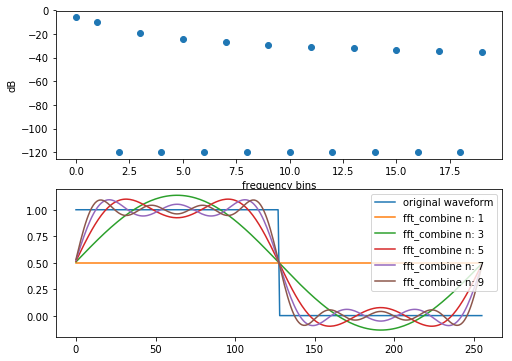

In [18]:
def square_wave(size):
    x = np.arange(0, 1, 1.0/size)
    y = np.where(x < 0.5, 1, 0)
    return x, y

fft_size = 256
x, y = square_wave(fft_size)
yf = np.fft.fft(y) / fft_size

fig, axes = plt.subplots(2, 1, figsize = (8, 6))
axes[0].plot(np.clip(20 * np.log10(np.abs(yf[:20])), -120, 120), 'o', label = 'spectrum')
axes[0].set_xlabel('frequency bins')
axes[0].set_ylabel('dB')

axes[1].plot(y, label = 'original waveform')
for n in range(1, 10, 2):   
    axes[1].plot(fft_combine(yf, n, 1)[1], label = 'fft_combine n: ' + str(n))
    
plt.legend();
plt.legend();

### 11.4.3 觀察訊號的頻譜

main freq: 234.375Hz


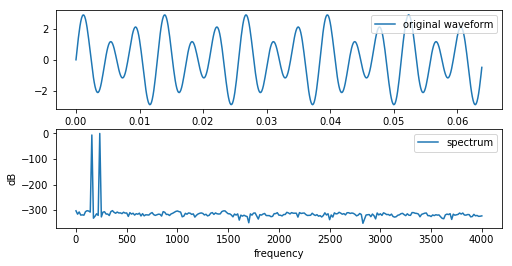

In [19]:
sampling_rate = 8000  # 採樣頻率
fft_size = 512  # FFT 的 長度/階層深度

t = np.arange(0, 1.0, 1.0/sampling_rate)  # 取樣時間 1 秒，取 8000 個samples
x = np.sin(2 * np.pi * 156.25 * t) + 2 * np.sin(2 * np.pi * 234.375 * t)  # 混和波形，156.25Hz, 234.375Hz
# 取波形中的N個資料點進行FFT轉換，當這N個資料點包含整數個週期的波形時，FFT所計算的結果是精確的
# 因此能精確計算的波形週期是： n x 取樣頻率 / N = n x 8000/512 = n x 15.625, 即只能精確表示 15.625Hz整數倍週期的波形。


def show_fft(x):
    plt.figure(figsize = (8, 4))
    
    # 繪製 時域 圖形
    plt.subplot(211)
    xs = x[:fft_size]  # xs 為 8000Hz 採樣頻率之下，對混和波形 採到的前面 fft_size 個樣本
    plt.plot(t[:fft_size], xs, label = 'original waveform')
    plt.xlabel('time (seconds)') 
    plt.legend()
    
    # 繪製 頻域 圖形
    plt.subplot(212)    
    xf = np.fft.rfft(xs) / fft_size  # xf 為 xf 的 rFFT 結果, 傳回的size 為 N/2+1 = 512/2 + 1 = 257, 兩個 FFT 結點可以對應一個頻率
    freqs = np.linspace(0, sampling_rate/2, xf.size) # fft_size/2 + 1)  # 頻率範圍，最高為 sampling_rate / 2， 因為fft_size有限，以 fft_size/2 + 1 為step
    xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))  # 能量大小
    print('main freq: {}Hz'.format(freqs[np.argmax(xfp)]))
    plt.plot(freqs, xfp, label = 'spectrum')
    plt.xlabel('frequency')     
    plt.ylabel('dB')        
    plt.legend()
    
show_fft(x);

#### 頻譜洩漏 

main freq: 296.875Hz


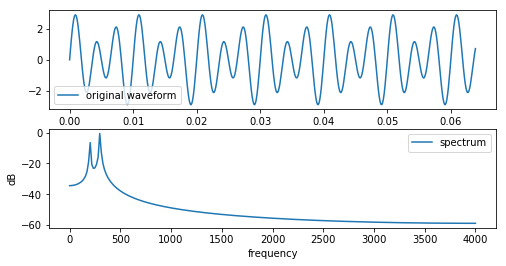

In [20]:
# 200, 300Hz 不是 15.625Hz 的整數倍，所以做完FFT之後會有 頻譜洩漏 的情況，來源頻率的周圍頻率的能量並不為零。
x = np.sin(2 * np.pi * 200 * t) + 2 * np.sin(2 * np.pi * 300 * t)   
show_fft(x)

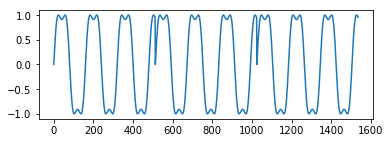

In [21]:
plt.figure(figsize = (6, 2))
t = np.arange(0, 1, 1/sampling_rate)
x = np.sin(2 * np.sin(t * 50 * 2 * np.pi))
plt.plot(np.hstack((x[:fft_size],x[:fft_size],x[:fft_size])));

main freq: 46.875Hz


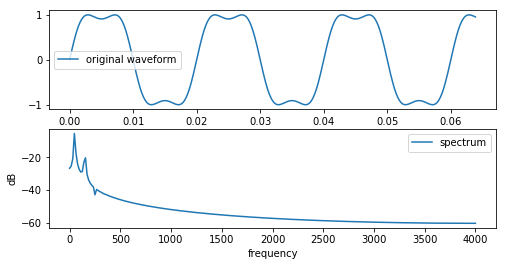

In [22]:
show_fft(x)

#### 11.4.3.1 窗函數
$w(n) = 0.5 \left(1 - \cos \left(\frac{2 \pi n}{N-1} \right) \right)$

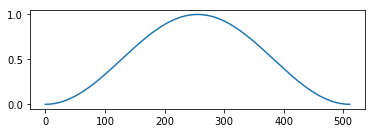

In [23]:
from scipy import signal 

plt.figure(figsize = (6, 4))
plt.subplot(211).plot(signal.hann(512));
# Hann window
# 兩端都是零，所以週期與週期相接的地方會在接近0的地方相會

In [24]:
print(signal.hann(6))
print(signal.hann(6, sym = False))
# sym = False, 則捨去最後的 0，以避免連續0值的問題 

[ 0.         0.3454915  0.9045085  0.9045085  0.3454915  0.       ]
[ 0.    0.25  0.75  1.    0.75  0.25]


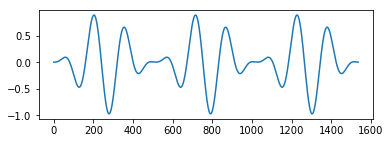

In [25]:
# 50Hz的訊號乘上 Hann window
plt.figure(figsize = (6, 2))
t = np.arange(0, 1.0, 1.0/sampling_rate)
x = np.sin(2 * np.pi * 50 * t)[:fft_size] * signal.hann(fft_size, sym = False)  # 50Hz的訊號乘上 Hann window
plt.plot(np.hstack((x, x, x)));

main freq: 46.875Hz


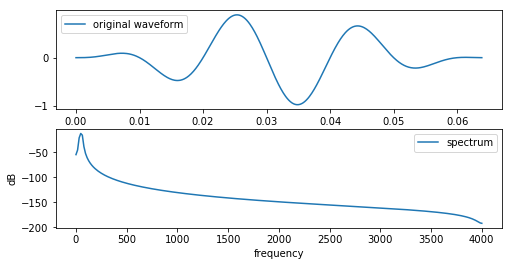

In [26]:
show_fft(x)
# 跳變的頻率不見了

main freq: 296.875Hz


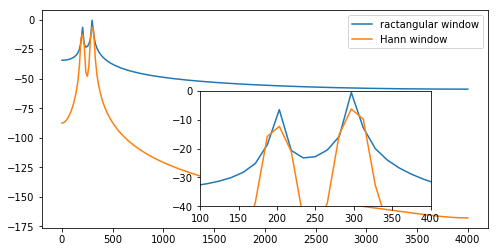

In [27]:
# 將 200, 300Hz 的訊號乘上 Hann window 再做 FFT 分析
# 能量更集中但有衰減

fft_size = 512
t = np.arange(0, 1.0, 1.0/sampling_rate)
x = np.sin(2 * np.pi * 200 * t) + 2 * np.sin(2 * np.pi * 300 * t)  # 200+300Hz
xs = x[:fft_size]  # 取前面 fft_size 個資料點
ys = xs * signal.hann(fft_size, sym = False)  # 乘以 Hann window

xf = np.fft.rfft(xs) / fft_size  #  頻譜
yf = np.fft.rfft(ys) / fft_size

freqs = np.linspace(0, sampling_rate / 2, yf.size)
xfp = 20 * np.log10(np.clip(np.abs(xf), 1e-20, 1e100))
yfp = 20 * np.log10(np.clip(np.abs(yf), 1e-20, 1e100))

plt.figure(figsize = (8, 4))

plt.plot(freqs, xfp, label = 'ractangular window')
plt.plot(freqs, yfp, label = 'Hann window')
plt.legend();
print('main freq: {}Hz'.format(freqs[np.argmax(yfp)]))

ax = plt.axes([0.4, .2, .4, .4])
ax.plot(freqs, xfp, label = 'ractangular window')
ax.plot(freqs, yfp, label = 'Hann window')
ax.set_xlim(100, 400)
ax.set_ylim(-40, 0);

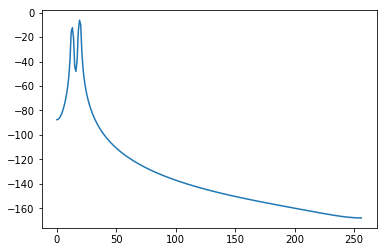

In [28]:
plt.plot(yfp, label = 'Hann window');
# N = 512 個 FFT點，可以產生 (N/2) + 1 = 257 個頻率x軸點
# 只要有 採樣的資料點 就可以作 FFT，但是其結果代表的頻譜 卻是要參考 sampling-rate 才能決定

In [29]:
np.mean(signal.hann(fft_size))
# Hann window 會衰減訊號

#### 11.4.3.2 頻譜平均

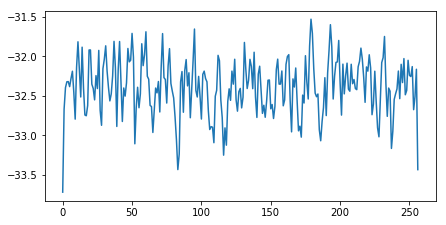

In [30]:
# 對於頻譜特性不隨時間變化的訊號
# 長時間取樣，分段進行 FFT 計算，將每段的 FFT 數值平均，就可以求出準確的測量訊號的頻譜

def average_fft(x, fft_size):
    # 區塊分段
    n = len(x) // fft_size * fft_size
    tmp = x[:n].reshape(-1, fft_size)
    
    tmp *= signal.hann(fft_size, sym = False) # 每段乘上 Hann window
    xf = np.abs(np.fft.rfft(tmp) / fft_size)  # 每段求 FFT
    avgf = np.mean(xf, axis = 0)  # 每段的 FFT 求平均值
    return 20 * np.log10(avgf)  # 計算能量值

x = np.random.randn(100000)  # white noise，但是沒有時間軸的資料
xf = average_fft(x, 512)  # 以 FFT_size = 512 去切割並分析資料

plt.figure(figsize = (7, 3.5))
plt.plot(xf);

#### 用頻譜分析 IIR濾波器的頻率回應特性

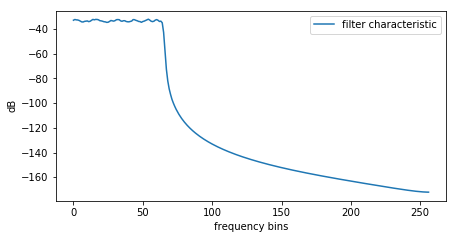

In [31]:
freq_nyquist = 4000.
fft_size = 512

b, a = signal.iirdesign(wp = 1000./freq_nyquist, ws = 1100/freq_nyquist,
                        gpass = 1, gstop = 40, 
                        analog = False, ftype = 'cheby1')  # 濾波器設計

x = np.random.randn(100000)  # white noise，但是沒有時間軸的資料
y = signal.filtfilt(b, a, x)  # 用濾波器對 x 濾波

yf = average_fft(y, fft_size)  # 濾波的結果 求平均FFT

plt.figure(figsize = (7, 3.5))
plt.plot(yf, label = 'filter characteristic')
plt.xlabel('frequency bins')
plt.ylabel('dB')
# plt.xlim(0, 150)
plt.legend();

#### 11.4.3.3 Spectrogram [時頻譜](https://zh.wikipedia.org/wiki/%E6%97%B6%E9%A2%91%E8%B0%B1)
#### STFT (Short-time Fourier transform) [短時距傅立葉變換](https://zh.wikipedia.org/wiki/%E7%9F%AD%E6%99%82%E8%B7%9D%E5%82%85%E7%AB%8B%E8%91%89%E8%AE%8A%E6%8F%9B)

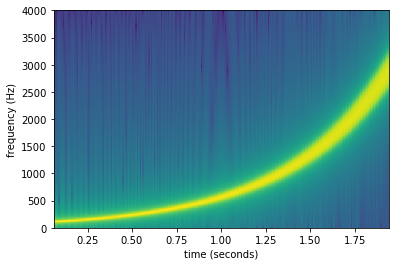

In [32]:
sampling_rate = 8000  # 採樣頻率
fft_size = 1024  # FFT 點數
# step = fft_size / 16  # 
# noverlap = fft_size - step  # 連續兩塊資料之間重疊部份的長度
noverlap = fft_size * (1. - 1./16)  # 連續兩塊資料之間重疊部份的長度，重疊越多，FFT運算的次數越多，時間軸上的精度也就越大
time = 2  # 兩秒的時間區間

t = np.arange(0, time, 1/sampling_rate)  # 0~2 秒的時間軸點
sweep = signal.chirp(t, f0 = 100, t1 = time, f1 = 0.8 * sampling_rate / 2, method = 'logarithmic')  # 產生一段 chirp 訊號

plt.specgram(sweep, fft_size, sampling_rate, noverlap = noverlap)  # 用 matplotlib 的 specgram() 繪製 spectrogram

plt.xlabel('time (seconds)')
plt.ylabel('frequency (Hz)');

#### 11.4.3.4 精確測量訊號頻率
FFT的頻率解析度 可以透過 取樣頻率/FFT長度 計算，若僅僅根據頻譜峰值的位置來測量訊號頻率，則為了精確測量 只能加長FFT的長度。  

本節使用 FFT結果中的相位資訊，在不增加 FFT 長度的情況下可以精確測量頻率。

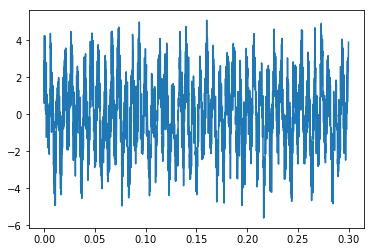

In [33]:
def make_wave(amp, freq, phase, tend, rate):
    period = 1.0 / rate
    t = np.arange(0, tend, period)
    x = np.zeros_like(t)
    for a, f, p in zip(amp, freq, phase):  # 混和波形
        x += a * np.sin(2 * np.pi * f * t + p)    
    return t, x

sampling_rate = 8000
t, x = make_wave([1, 2, 0.5], [44, 150, 330], [1, 1.4, 1.8], 0.3, sampling_rate)  # 用 振幅/頻率/相位 混和波形
x += np.random.randn(len(x))  # 加上 noise

plt.plot(t, x);

bin width: 7.8125
Peak_frequencies: [  46.875   148.4375  328.125 ]


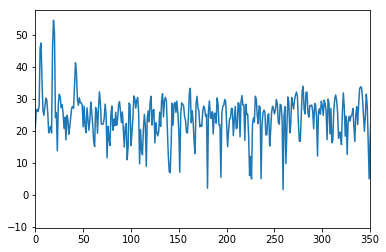

In [34]:
fft_size = 1024
spect1 = np.fft.rfft(x[:fft_size] * np.hanning(fft_size))  # 乘上 Hann window，然後作 FFT 求頻譜
amp_spect1 = np.abs(spect1)  # 頻譜的能量

freqs = np.fft.fftfreq(fft_size, 1./sampling_rate)  # 計算頻率範圍
bin_width = np.diff(freqs)[0]  # 頻率解析度

loc,  = signal.argrelmax(amp_spect1, order = 3)  # 尋找能量的 區域最大 的頻率
mask = amp_spect1[loc] > amp_spect1.mean() * 3  # 大於平均值
loc = loc[mask]  # 區域最大，且大於平均值的 頻率位置
peak_freqs = freqs[loc]


print('bin width:', bin_width)
print('Peak_frequencies:', peak_freqs)

# freqs = freqs[freqs>0]
# x_freq = np.linspace(freqs[0], freqs[-1], spec1.size)
plt.plot(20 * np.log10(amp_spect1));
plt.xlim(0, 350);

In [35]:
COUNT = fft_size//4
dt = COUNT / 8000.0

spect2 = np.fft.rfft(x[COUNT:COUNT+fft_size] * np.hanning(fft_size))  # 經過 fft_size/4 個採樣點之後 再取樣一次

phase1 = np.angle(spect1[loc])  # 樣本1 峰值的相位
phase2 = np.angle(spect2[loc])  # 樣本2 峰值的相位

phase_delta = phase2 - phase1  # 相位差
print(phase_delta)

[ 2.52971459 -1.27983319 -2.80136298]


如果在 $\Delta t$ 的時間內，相位變化了 $\Delta \theta$，則可以根據以下公式計算頻率：  

$\mathbb{f}_n = \frac {\Delta \theta + 2 n \pi}{2 \pi \Delta t} , \, n = 0 ... \infty$

In [36]:
max_n = (peak_freqs.max() + 3*bin_width) * dt  # fft_size/4 個採樣點的時間，峰值頻率 走了幾個週期
n = np.arange(max_n)  # 產生 0~max_n 的序列

possible_freqs = (phase_delta + 2*np.pi*n[:, None]) / (2 * np.pi * dt)  # 根據公式，計算可能的頻率

idx = np.argmin(np.abs(peak_freqs - possible_freqs), axis=0)   # 求出 差異最小的頻率的 位置
peak_freqs2 = possible_freqs[idx, np.arange(len(peak_freqs))]  # 抓出頻率值
print("Peak Frequencies:", peak_freqs2)

Peak Frequencies: [  43.83176817  149.88463194  329.81716359]


In [37]:
possible_freqs

array([[  12.58176817,   -6.36536806,  -13.93283641],
       [  43.83176817,   24.88463194,   17.31716359],
       [  75.08176817,   56.13463194,   48.56716359],
       [ 106.33176817,   87.38463194,   79.81716359],
       [ 137.58176817,  118.63463194,  111.06716359],
       [ 168.83176817,  149.88463194,  142.31716359],
       [ 200.08176817,  181.13463194,  173.56716359],
       [ 231.33176817,  212.38463194,  204.81716359],
       [ 262.58176817,  243.63463194,  236.06716359],
       [ 293.83176817,  274.88463194,  267.31716359],
       [ 325.08176817,  306.13463194,  298.56716359],
       [ 356.33176817,  337.38463194,  329.81716359]])

### 11.4.4 [Convolution](https://en.wikipedia.org/wiki/Convolution) [旋積運算](https://zh.wikipedia.org/wiki/%E5%8D%B7%E7%A7%AF)

時域的旋積等於頻域的乘積  

#### 11.4.4.1 快速旋積

In [38]:
def fft_convolve(a, b):
    n = len(a) + len(b) - 1  # convolve 之後的長度
    N = 2**(int(np.log2(n)) + 1)  # 找到 大於n 的 最小的2的整數次幕
    A = np.fft.fft(a, N)  # 對 a 作 FFT
    B = np.fft.fft(b, N)  # 對 b 作 FFT
    return np.fft.ifft(A * B)[:n]  # A*B之後 再做 IFFT 由頻域轉回時域

a = np.random.rand(128)
b = np.random.rand(128)
c = np.convolve(a, b)
np.allclose(fft_convolve(a, b), c)

True

In [39]:
import scipy

a = np.random.rand(10000)
b = np.random.rand(10000)

# 比較速度，fft_convolve快很多
%timeit np.convolve(a, b)
%timeit fft_convolve(a, b)
%timeit scipy.signal.fftconvolve(a, b)

c = np.convolve(a, b)
c1 = fft_convolve(a, b)
c2 = scipy.signal.fftconvolve(a, b)

np.allclose(c, c1, c2)

10 loops, best of 3: 42.4 ms per loop
100 loops, best of 3: 5.33 ms per loop
1000 loops, best of 3: 1.59 ms per loop


True

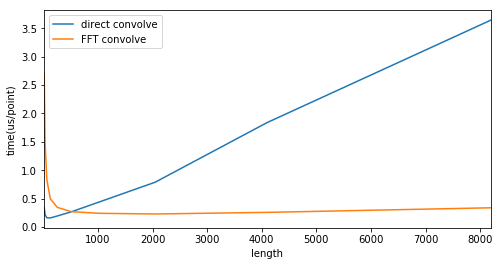

In [40]:
#%fig=比較直接卷冊積和FFT卷冊積的運算速度
results = []
for n in range(4, 14):
    N = 2**n
    a = np.random.rand(N)
    b = np.random.rand(N)
    tr1 = %timeit -r 1 -o -q np.convolve(a, b)
#     tr1 = %timeit -r 1 -o -q scipy.signal.fftconvolve(a, b)
    tr2 = %timeit -r 1 -o -q fft_convolve(a, b)
    
    t1 = tr1.best * 1e6 / N
    t2 = tr2.best * 1e6 / N
    results.append((N, t1, t2))
results = np.array(results)

plt.figure(figsize=(8,4))
plt.plot(results[:, 0], results[:, 1], label=u"direct convolve")
plt.plot(results[:, 0], results[:, 2], label=u"FFT convolve")
plt.legend()
plt.ylabel(u"time(us/point)")
plt.xlabel(u"length")
n_list = results[:, 0]
plt.xlim(min(n_list),max(n_list));

#### 11.4.4.2 旋積的 分段運算 (Overlap-add)

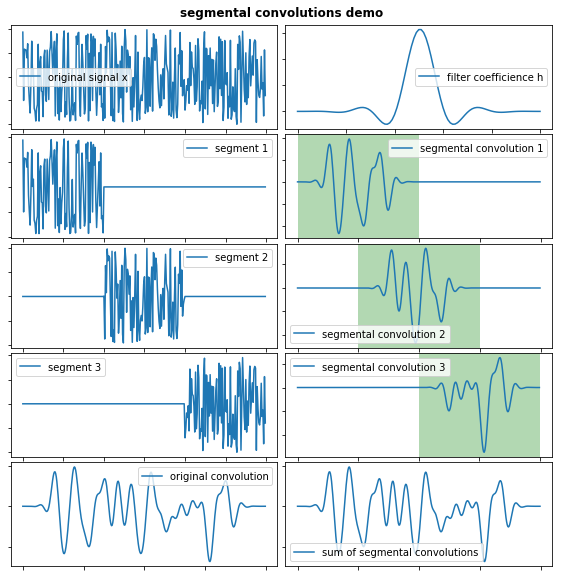

In [41]:
#%figonly=使用overlap-add法進行分段卷冊積的過程示範
def windowed_sinc(fc, M, K):
    i = np.arange(0,M,1.0)
    h = K * np.sin(2*np.pi*fc*(i-M/2.0))/(i-M/2.0)
    h *= 0.42 - 0.5*np.cos(2*np.pi*i/M) + 0.08*np.cos(4*np.pi*i/M)
    return h
    
x = np.random.rand(300) - 0.5   
h = windowed_sinc(0.05, 101, 1.0)

xs = []
for i in range(3):
    tmp = np.zeros(len(x), dtype=np.float64)
    tmp[i*100:i*100+100] = x[ i*100:i*100+100 ]
    xs.append(tmp)

y = np.convolve(x,h)
fig = plt.figure(figsize=(8, 8))

plt.subplot(521)
plt.plot(x, label=u"original signal x")
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.legend()

plt.subplot(522)
plt.plot(h, label=u"filter coefficience h")
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.legend()

result = []
for i,tmp in enumerate(xs):
    plt.subplot(520+3+i*2)
    plt.plot(tmp, label=u"segment %s" % (i+1))
    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])
    plt.legend()
    plt.subplot(520+3+i*2+1)
    tmp = np.convolve(tmp, h)
    result.append(tmp)
    plt.plot(tmp, label=u"segmental convolution %s" % (i+1))
    plt.gca().set_yticklabels([])
    plt.gca().set_xticklabels([])  
    plt.axvspan(i*100,i*100+200,alpha=0.3,facecolor="g")
    plt.legend()

plt.subplot(529)
plt.plot(np.convolve(x,h), label=u"original convolution")
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])  
plt.legend()

plt.subplot(5,2,10)
plt.plot(np.sum(result, axis=0), label=u"sum of segmental convolutions")
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([]) 
plt.legend()

plt.subplots_adjust(hspace=0.05, wspace=0.03, top=0.95, bottom=0.01,left=0.03,right=0.97)
plt.figtext(0.5, 0.965,  u"segmental convolutions demo",
           ha='center', color='black', weight='bold', size='large');

In [42]:
x = np.random.rand(1000)
h = np.random.rand(101)
y = np.convolve(x, h)  # 直接卷冊積

N = 50 # 分段大小
M = len(h) # 濾波器長度

output = []

#快取起始化為0
buffer = np.zeros(M+N-1,dtype=np.float64)

for i in range(int(len(x)/N)):
    #從輸入訊號中讀取N個資料
    xslice = x[i*N:(i+1)*N]
    #計算卷冊積
    yslice = np.convolve(xslice, h)
    #將卷冊積的結果加入到緩沖中
    buffer += yslice
    #輸出快取中的前N個資料，注意使用copy，否則輸出的是buffer的一個檢視
    output.append( buffer[:N].copy() ) #❶
    #快取中的資料左搬移N個元素
    buffer[0:-N] = buffer[N:]
    #後面的補0
    buffer[-N:] = 0

#將輸出的資料群組合為陣列
# 重新組合起來
y2 = np.hstack(output)

#計算和直接卷冊積的結果之間的誤差
print("error:", np.max(np.abs( y2 - y[:len(x)] ) ))

error: 7.1054273576e-15
